# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler



## Data Import

In [2]:
data = pd.read_csv(r'data/Wholesale_Data.csv')

## Data Cleaning

In [3]:
# Confirm Data Types and null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


    i.e. No Nulls needed to be imputed.  All categories are already cleaned integer numbers.  Errors in the data will be more apparent with outlier detection and visualization

## Data Description

In [4]:
# Confirm Nominal Columns (refer to glossary in README.md)
data['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

    i.e. 298 = Horeca, 142 = Retail

In [5]:
# Dictionary of values
channel_dict = {1: "Horeca", 2: "Retail"}

In [6]:
data['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

    i.e. Other Region = 316, Lisbon = 77, Oporto = 47

In [7]:
# Dictionary of values
region_dict = {1: "Lisbon", 2: "Oporto", 3:"Other Region"}

In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


    Channel and Region are within the proper in and max range
    Max values are quite large in comparison to the quartiles for the continuous variables.  
    The averages are much higher than the medians.  
    The standard deviations are large enough to say that all values below the average are within a single standard deviation.
    There are no negative values

## Data Visualization

In [9]:

# Specify the nominal columns
qual_list = ['Channel', 'Region']

quant_list = data.drop(columns=qual_list).columns.tolist()

# Define a color cycler
color_cycler = itertools.cycle(['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00',
                                '#00FFFF', '#FF8000', '#8000FF', '#0080FF', '#FF0080'])
# Dictionary of figures
fig_dict = {}

### Figure 1: Histograms of quantitative variables

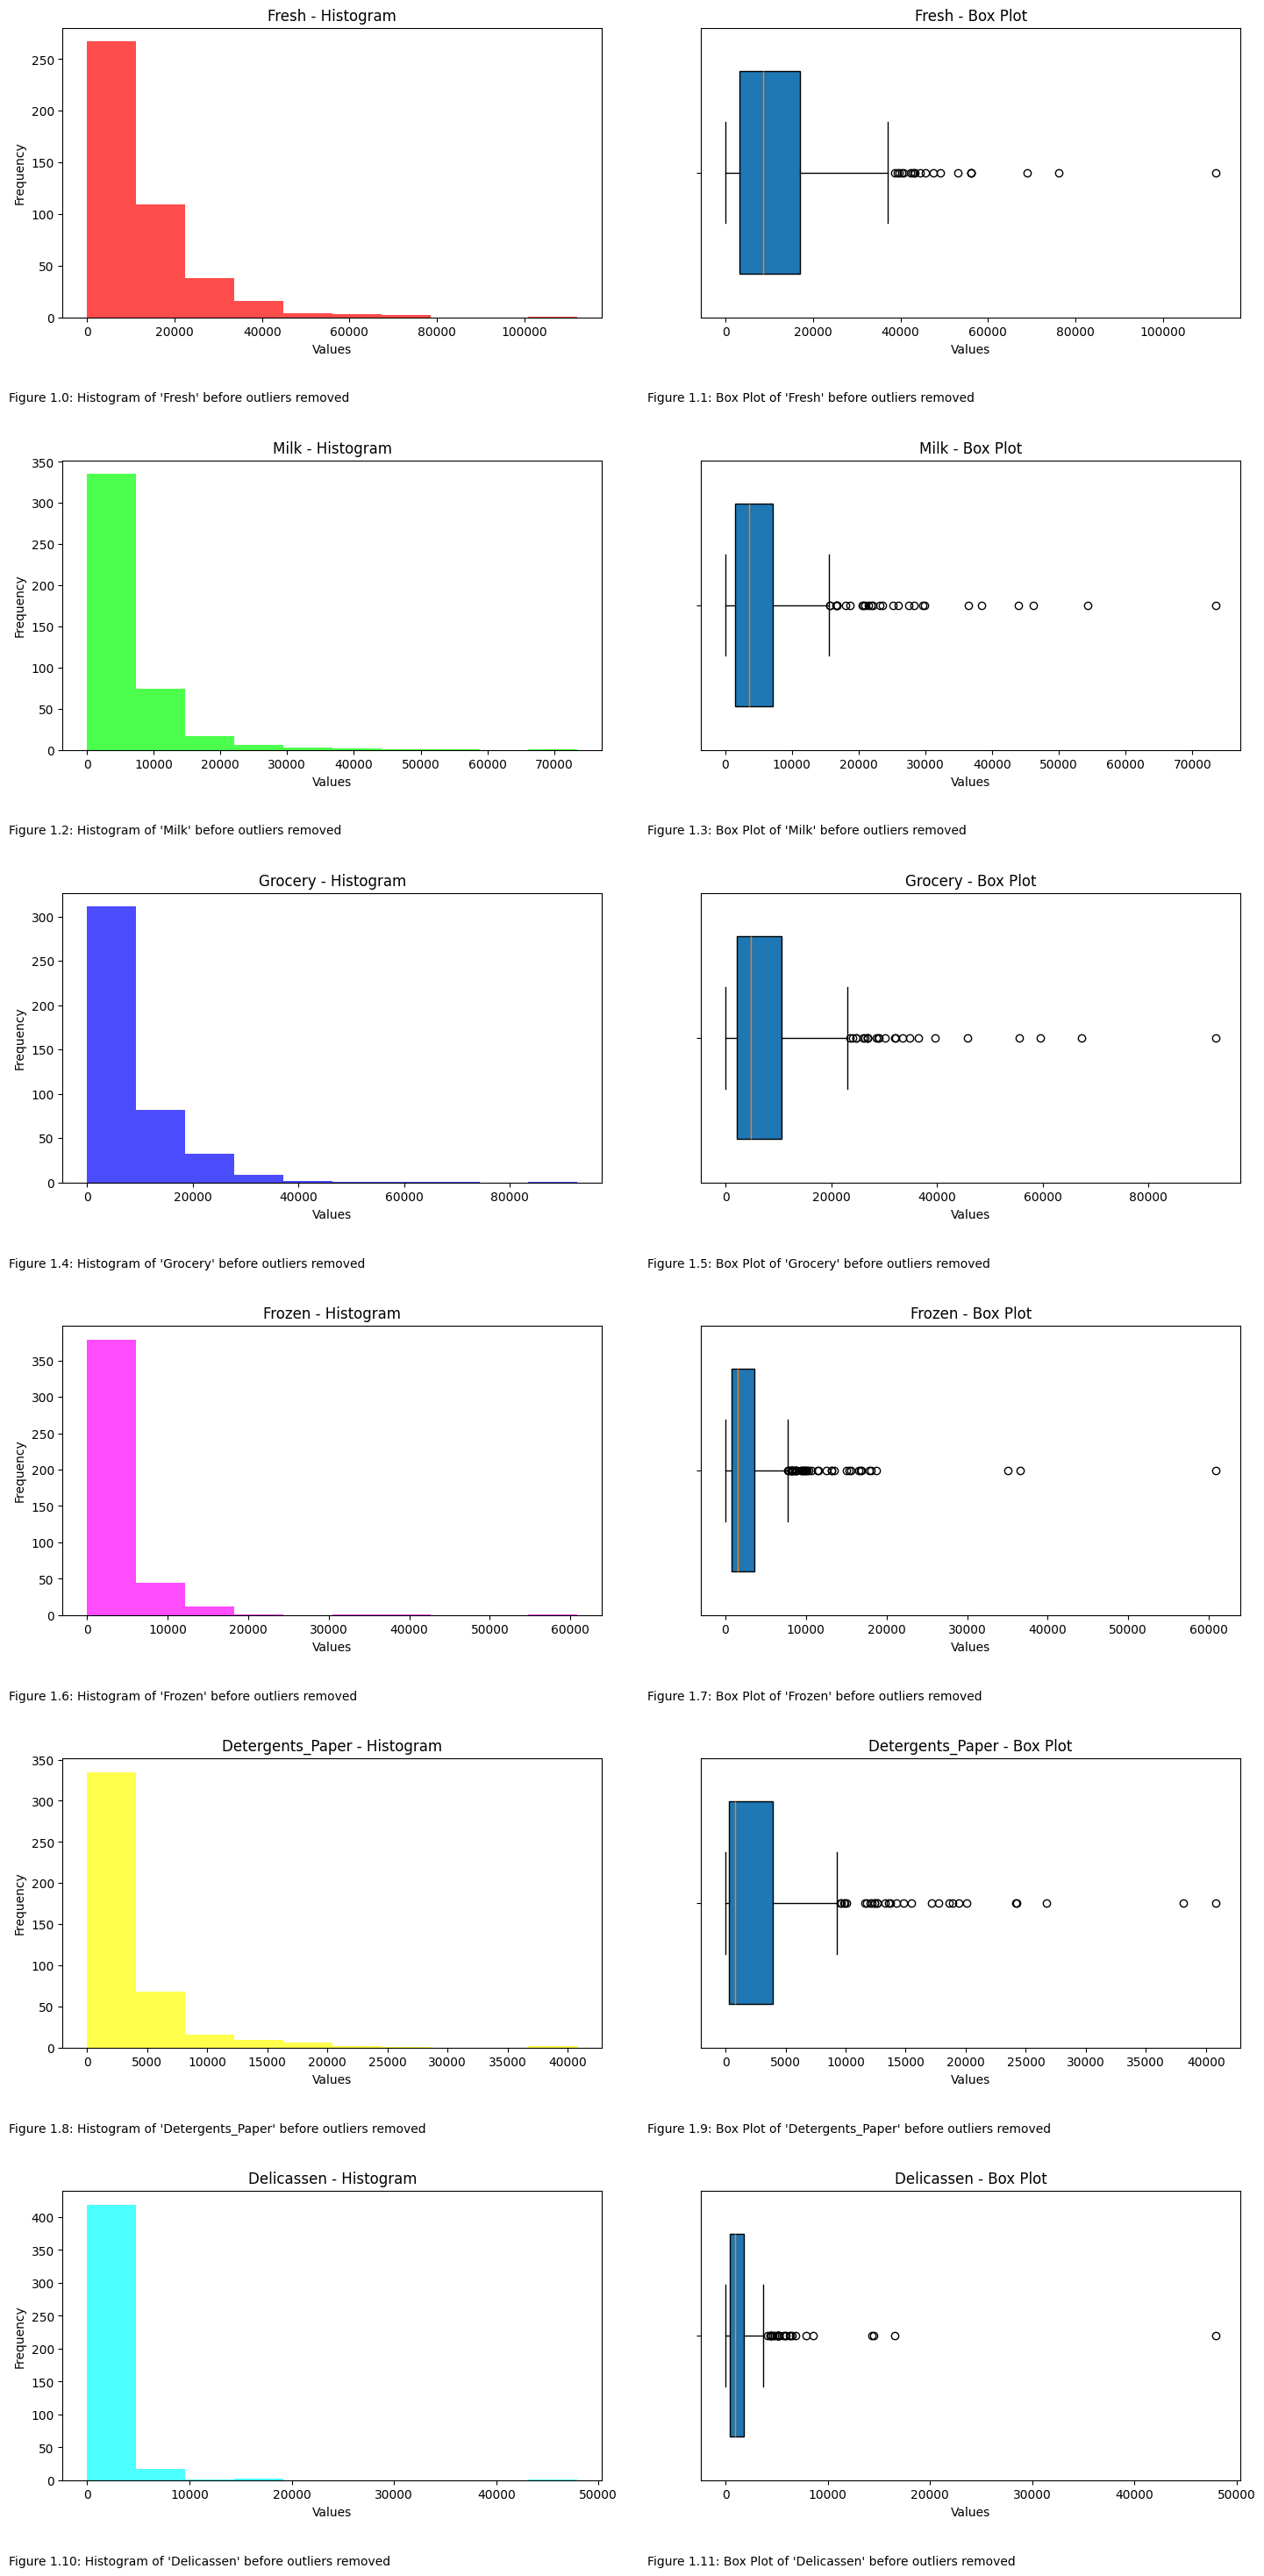

In [10]:
def viz_quant_hist(dataframe: pd.DataFrame, columns_list: list, fig_num: int, figure_str: str):
    
    # Create subplots
    fig, axes = plt.subplots(nrows=len(columns_list), ncols=2, figsize=(15, 5 * len(columns_list)))

    for i, column in enumerate(columns_list):
        data_series = dataframe[column]
        colour = next(color_cycler)

        # Plot histogram for the column
        axes[i, 0].hist(data_series, alpha=0.7, color=colour)
        axes[i, 0].set_xlabel('Values')
        axes[i, 0].set_ylabel('Frequency')
        axes[i, 0].set_title(f'{column} - Histogram')
        text_hist = f"Figure {fig_num}.{i * 2}: Histogram of '{column}' {figure_str}"
        axes[i, 0].text(-0.1, -0.3, text_hist, transform=axes[i, 0].transAxes, fontsize=10,
                        verticalalignment='bottom', horizontalalignment='left', color='black')
        
        # Store the figure 
        fig_dict[f"Figure {fig_num}.{i * 2}"] = f"Histogram of '{column}' {figure_str}"
        
        # Plot box plot for the colun
        axes[i, 1].boxplot(data_series, vert=False, widths=0.7, patch_artist=True)
        axes[i, 1].set_yticklabels([])  # Hide y-axis labels for box plot
        axes[i, 1].set_xlabel('Values')
        axes[i, 1].set_title(f'{column} - Box Plot')
        text_box = f"Figure {fig_num}.{i * 2 + 1}: Box Plot of '{column}' {figure_str}"
        axes[i, 1].text(-0.1, -0.3, text_box, transform=axes[i, 1].transAxes, fontsize=10,
                        verticalalignment='bottom', horizontalalignment='left', color='black')
        
        # Store the figure 
        fig_dict[f"Figure {fig_num}.{i * 2 + 1}"] = f"Box Plot of '{column}' {figure_str}"
        

    # Tighten the layout
    plt.tight_layout(pad=3)

    # Prep string for filename
    figure_str = figure_str.replace(' ', '_')

    # Save the figure as a PDF
    plt.savefig(f'visualizations/figure_{fig_num}_histograms_boxplots_of_quantitative_variables_{figure_str}.pdf')

    # Show the plots
    plt.show()

# run the function
viz_quant_hist(data, quant_list, 1, "before outliers removed")

### Figure 2: Frequency of categories

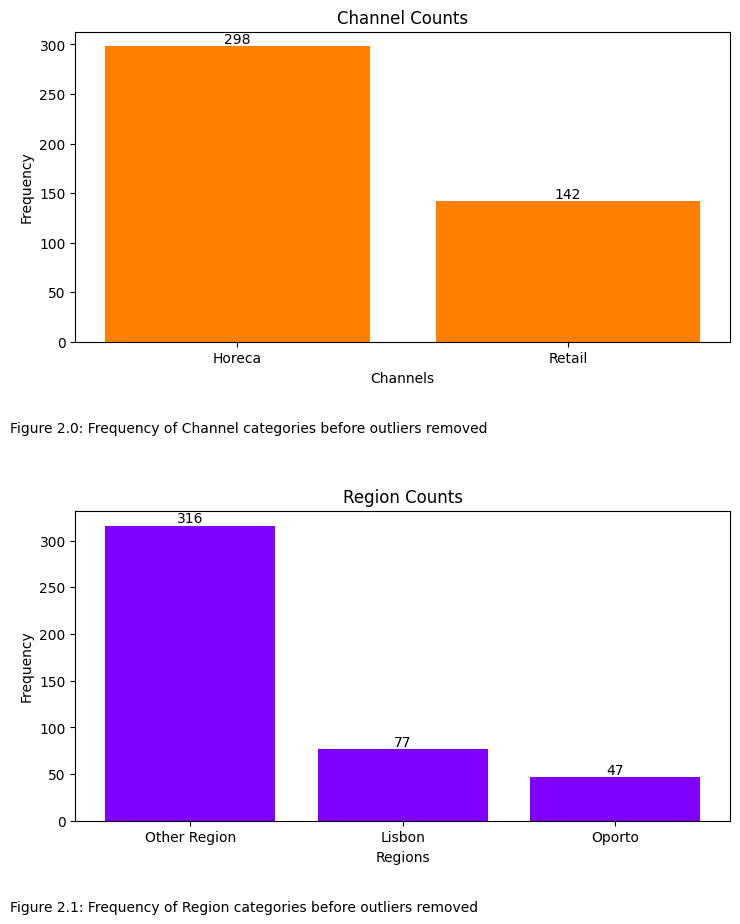

In [11]:
def viz_qual_freq(dataframe: pd.DataFrame, columns_list: list, fig_num: int, figure_str: str):
    
    data_qual = dataframe[qual_list].copy()
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=len(columns_list), ncols=1, figsize=(8, 5 * len(columns_list)))

    # Plot nominal data
    for i, column in enumerate(data_qual.columns):
        
        # get the dictionary
        column_dict_name  = f"{column.lower()}_dict"
        column_dict = globals().get(column_dict_name)
        
        # Replace numerical values with category names
        data_qual[column] = data_qual[column].map(column_dict)

        # Count the occurrences of each category
        counts = data_qual[column].value_counts()
        colour = next(color_cycler)
        
        # Plot histogram on the respective subplot
        axes[i].bar(counts.index, counts.values, color=colour)
        axes[i].set_xlabel(f'{column}s')
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'{column} Counts')
        
        text = f"Figure {fig_num}.{i}: Frequency of {column} categories {figure_str}"
        axes[i].text(-0.1, -0.3, text, transform=axes[i].transAxes, fontsize=10,
                    verticalalignment='bottom', horizontalalignment='left', color='black')
        # Store the figure 
        fig_dict[f"Figure {fig_num}.{i}"] = f"Frequency of '{column}' categories {figure_str}"
        
        # Display the counts on top of the bars
        for j, count in enumerate(counts.values):
            axes[i].text(j, count + 0.1, str(count), ha='center', va='bottom')

    # tighten the layout
    plt.tight_layout(pad = 3)
    
    # Stage string for filename
    figure_str = figure_str.replace(" ", "_")
    
    # Save the figure as a PDF
    plt.savefig(f"visualizations/figure_{fig_num}_frequency_of_categories_{figure_str}.pdf")

    # Show the plots
    plt.show()
    
# Run the function
viz_qual_freq(data, qual_list, 2, "before outliers removed")

### Figure 3: Scatter plots of quantitative variables

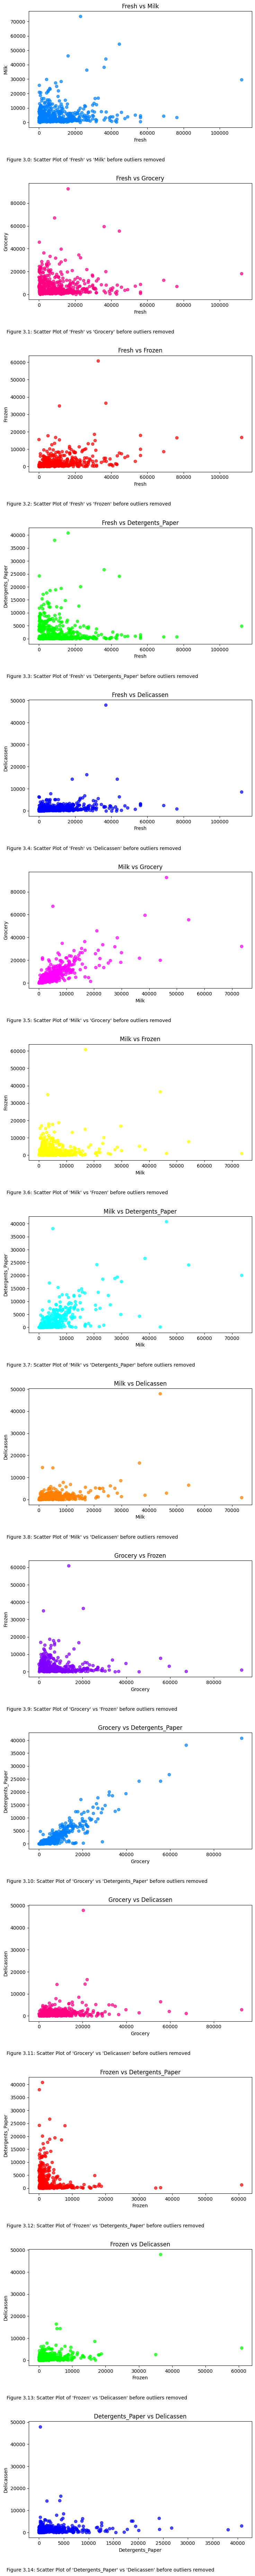

In [12]:
def viz_scatter_pairs(dataframe: pd.DataFrame, columns_list: list, fig_num: int, figure_str: str):
    
    column_combinations = list(itertools.combinations(quant_list, 2))
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=len(column_combinations), ncols=1, figsize=(8, 5 * len(column_combinations)))

    for i, element in enumerate(column_combinations):
        column1 = element[0]
        column2 = element[1]
        
        color = next(color_cycler)
        axes[i].scatter(dataframe[column1], dataframe[column2], color=color, alpha=0.7)
        axes[i].set_xlabel(column1)
        axes[i].set_ylabel(column2)
        axes[i].set_title(f'{column1} vs {column2}')

        text = f"Figure {fig_num}.{i}: Scatter Plot of '{column1}' vs '{column2}' {figure_str}"
        axes[i].text(-0.1, -0.3, text, transform=axes[i].transAxes, fontsize=10,
                        verticalalignment='bottom', horizontalalignment='left', color='black')
        # Store the figure 
        fig_dict[f"Figure {fig_num}.{i}"] = f"Scatter Plot of '{column1}' vs '{column2}' {figure_str}"

    # Tighten the layout
    plt.tight_layout(pad=3)

    # Prep string for filename
    figure_str = figure_str.replace(' ', '_')

    # Save the figure as a PDF
    plt.savefig(f'visualizations/figure_{fig_num}_scatter_plots_of_column_pairs_{figure_str}.pdf')

    # Show the plots
    plt.show()

# Apply the function
viz_scatter_pairs(data, quant_list, 3, "before outliers removed")

## Outlier Detection

In [13]:
def remove_outliers(dataframe: pd.DataFrame):
    outliers_info = {}
    dataframe = dataframe.copy()
    
    for column in dataframe.columns:
        
        # Calculate the first and third quartiles
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify lower and upper outliers
        lower_outliers = dataframe[column][dataframe[column] < lower_bound].count()
        upper_outliers = dataframe[column][dataframe[column] > upper_bound].count()
        
        # Replace outliers with NaN
        dataframe[column] = dataframe[column].apply(lambda x: np.NaN if x < lower_bound or x > upper_bound else x)
        
        # Store info in a dictionary
        outliers_info[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers
        }
    dataframe = dataframe.dropna()
    return outliers_info, dataframe

# Run the function
outliers_info_dict, data_outliers_removed = remove_outliers(data)

# Print the summary
for column, info in outliers_info_dict.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")
    print(f"Number of Lower Outliers: {info['lower_outliers']}")
    print(f"Number of Upper Outliers: {info['upper_outliers']}")

Column: Channel
Lower Bound: -0.5
Upper Bound: 3.5
Number of Lower Outliers: 0
Number of Upper Outliers: 0
Column: Region
Lower Bound: 0.5
Upper Bound: 4.5
Number of Lower Outliers: 0
Number of Upper Outliers: 0
Column: Fresh
Lower Bound: -17581.25
Upper Bound: 37642.75
Number of Lower Outliers: 0
Number of Upper Outliers: 20
Column: Milk
Lower Bound: -6952.875
Upper Bound: 15676.125
Number of Lower Outliers: 0
Number of Upper Outliers: 28
Column: Grocery
Lower Bound: -10601.125
Upper Bound: 23409.875
Number of Lower Outliers: 0
Number of Upper Outliers: 24
Column: Frozen
Lower Bound: -3475.75
Upper Bound: 7772.25
Number of Lower Outliers: 0
Number of Upper Outliers: 43
Column: Detergents_Paper
Lower Bound: -5241.125
Upper Bound: 9419.875
Number of Lower Outliers: 0
Number of Upper Outliers: 30
Column: Delicassen
Lower Bound: -1709.75
Upper Bound: 3938.25
Number of Lower Outliers: 0
Number of Upper Outliers: 27


    Considering how few the number outliers there are, they will all be removed

In [14]:
# data_outliers_removed.describe()
describe_df = pd.DataFrame()
for i, column in enumerate(data[quant_list].columns):
    describe_df[f'{column}'] = data[column].describe()
    describe_df[f'{column}_a'] = data_outliers_removed[column].describe()

# Show the changes after the outliers were removed 
np.floor(describe_df)

,Fresh,Fresh_a,Milk,Milk_a,Grocery,Grocery_a,Frozen,Frozen_a,Detergents_Paper,Detergents_Paper_a,Delicassen,Delicassen_a
count,440.0,332.0,440.0,332.0,440.0,332.0,440.0,332.0,440.0,332.0,440.0,332.0
mean,12000.0,9547.0,5796.0,4105.0,7951.0,5875.0,3071.0,1863.0,2881.0,1958.0,1524.0,1016.0
std,12647.0,8161.0,7380.0,3363.0,9503.0,5038.0,4854.0,1707.0,4767.0,2347.0,2820.0,824.0
min,3.0,3.0,55.0,55.0,3.0,3.0,25.0,25.0,3.0,3.0,3.0,3.0
25%,3127.0,2989.0,1533.0,1352.0,2153.0,2011.0,742.0,582.0,256.0,231.0,408.0,360.0
50%,8504.0,7483.0,3627.0,3087.0,4755.0,3835.0,1526.0,1270.0,816.0,715.0,965.0,774.0
75%,16933.0,13987.0,7190.0,6251.0,10655.0,8928.0,3554.0,2587.0,3922.0,3461.0,1820.0,1456.0
max,112151.0,37036.0,73498.0,14982.0,92780.0,22272.0,60869.0,7683.0,40827.0,8969.0,47943.0,3637.0


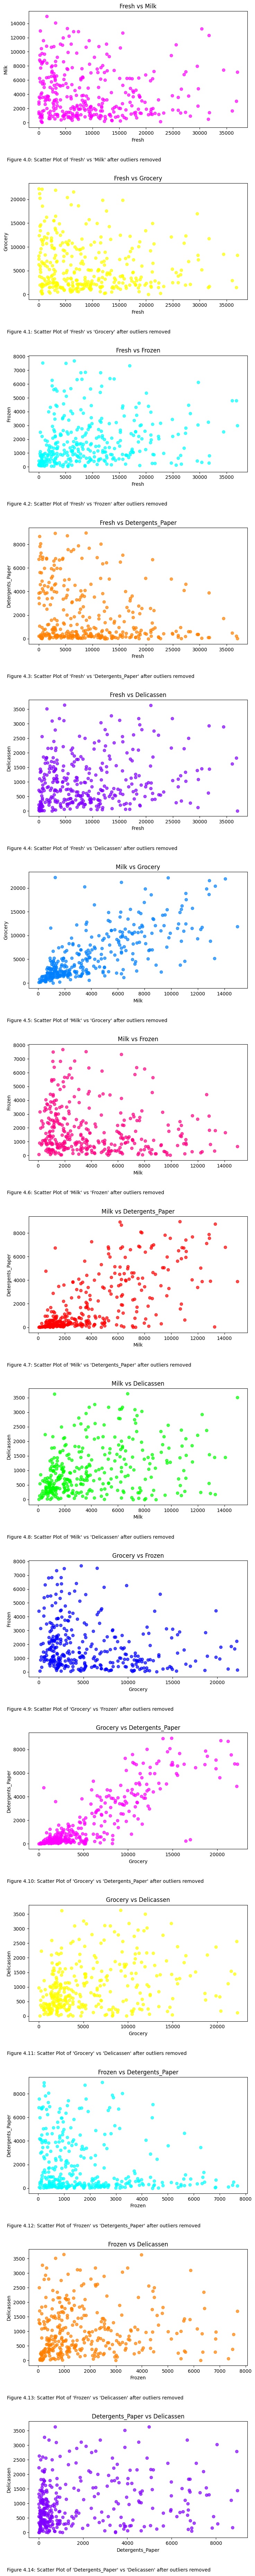

In [15]:
# View the changes
viz_scatter_pairs(data_outliers_removed, quant_list, 4, "after outliers removed")

## Correlation Analysis

In [16]:
correlation_matrix_before = data[quant_list].corr()
correlation_matrix_after = data_outliers_removed[quant_list].corr()
correlation_matrix_difference = abs(correlation_matrix_after) - abs(correlation_matrix_before)
correlation_matrix_difference


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,-0.022428,0.104305,-0.161149,0.124432,-0.065266
Milk,-0.022428,0.000000,-0.001130,0.030354,0.021408,-0.092681
Grocery,0.104305,-0.001130,0.000000,0.159341,-0.070319,0.067737
Frozen,-0.161149,0.030354,0.159341,0.000000,0.072285,-0.340062
Detergents_Paper,0.124432,0.021408,-0.070319,0.072285,0.000000,0.118888
Delicassen,-0.065266,-0.092681,0.067737,-0.340062,0.118888,0.000000


    The correlations before and after the outliers were removed only really changed the correlation between "Delicassen" and "Frozen"

### Figure 5: Correlation Heatmap of quant variables

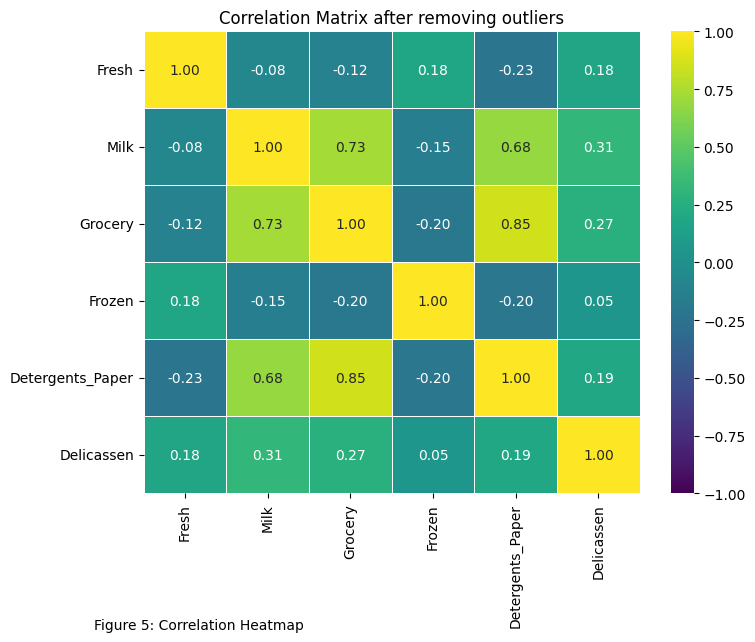

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_after, annot=True, cmap='viridis', fmt='.2f', linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix after removing outliers')

text = f"Figure 5: Correlation Heatmap"
plt.text(-0.1, -0.3, text, transform= plt.gca().transAxes, fontsize=10,
                verticalalignment='bottom', horizontalalignment='left', color='black')
# Store the figure 
fig_dict[f"Figure 5"] = f"Correlation Heatmap"

# Save the figure as a PDF
plt.savefig(f'visualizations/figure_5_correlation_heatmap.pdf')
    
plt.show()

    The only columns showing a strong correlation are 'grocery' and 'detergents_paper'; 'grocery' and 'milk'. Therefore, 'grocery' will be dropped.

In [38]:
corr_del_list = ['Grocery']

## Data Transformation

In [19]:
qual_dummy_list = []
qual_dummy_cols = pd.DataFrame()
data_outliers_removed_copy = data_outliers_removed.copy()

# Create dummy variables
for column in qual_list:
    
    # get the dictionary
    column_dict_name  = f"{column.lower()}_dict"
    column_dict = globals().get(column_dict_name)
    
    # Get dummy variables for the column with string 
    dummy_columns = pd.get_dummies(data_outliers_removed_copy[column].map(column_dict), prefix=column)
    
    for column in dummy_columns.columns.tolist():
        qual_dummy_list.append(column)
        qual_dummy_cols[column] = dummy_columns[column]
    
    # Concatenate the dummy columns with the original DataFrame
    data_outliers_removed_copy= pd.concat([data_outliers_removed_copy, dummy_columns], axis=1)

# Drop the original columns
data_dummies = data_outliers_removed_copy.drop(columns=qual_list)


In [31]:
# Apply scaling to the quant columns
data_dummies[quant_list] = StandardScaler().fit_transform(data_dummies[quant_list])

# Concatenate the dummy columns with the original DataFrame
data_scaled = pd.concat([data_dummies, data_outliers_removed_copy[qual_dummy_list]], axis=1)

In [35]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 439
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fresh                332 non-null    float64
 1   Milk                 332 non-null    float64
 2   Grocery              332 non-null    float64
 3   Frozen               332 non-null    float64
 4   Detergents_Paper     332 non-null    float64
 5   Delicassen           332 non-null    float64
 6   Channel_Horeca       332 non-null    bool   
 7   Channel_Retail       332 non-null    bool   
 8   Region_Lisbon        332 non-null    bool   
 9   Region_Oporto        332 non-null    bool   
 10  Region_Other Region  332 non-null    bool   
dtypes: bool(5), float64(6)
memory usage: 19.8 KB


## Feature Selection

### Variance Threshold

In [40]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
data_threshold = vt.fit_transform(data_scaled)

# Store as a dataframe
data_threshold = pd.DataFrame(data_threshold, columns = data_scaled.columns[vt.get_support()])
data_threshold.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fresh                332 non-null    float64
 1   Milk                 332 non-null    float64
 2   Grocery              332 non-null    float64
 3   Frozen               332 non-null    float64
 4   Detergents_Paper     332 non-null    float64
 5   Delicassen           332 non-null    float64
 6   Channel_Horeca       332 non-null    float64
 7   Channel_Retail       332 non-null    float64
 8   Region_Lisbon        332 non-null    float64
 9   Region_Other Region  332 non-null    float64
dtypes: float64(10)
memory usage: 26.1 KB


    After applying a variance threshold of 0.1, Region_Oporto was removed.  In anycase, if both region_ columns are a 0 value, then that will automatically mean the Region is Oporto.

### Correlations
    Drop columns with high correlations

In [45]:
data_threshold = data_threshold.drop(columns= corr_del_list)

### Drop unnecessary columns

In [ ]:
data_selected = data_threshold.copy()
data_selected = data_selected.drop(columns=["Channel_Horeca","Channel_Retail","Region_Lisbon",	"Region_Other Region"])

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

    Preprocessing already complete. 

### Optimal number of clusters

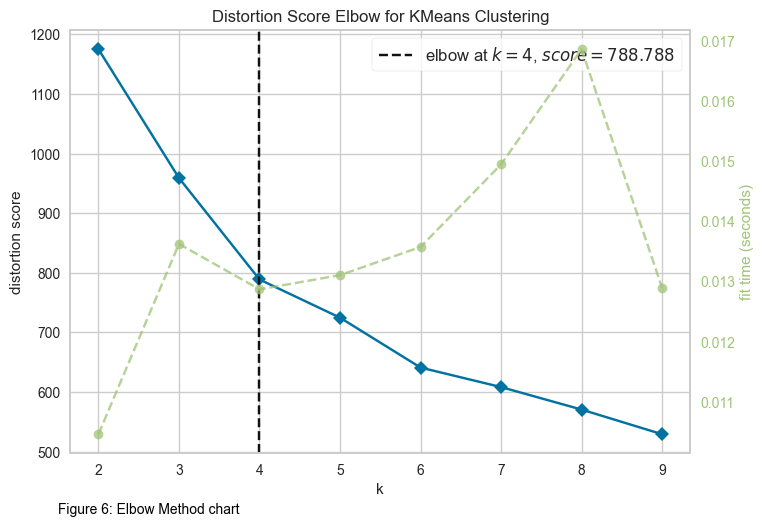

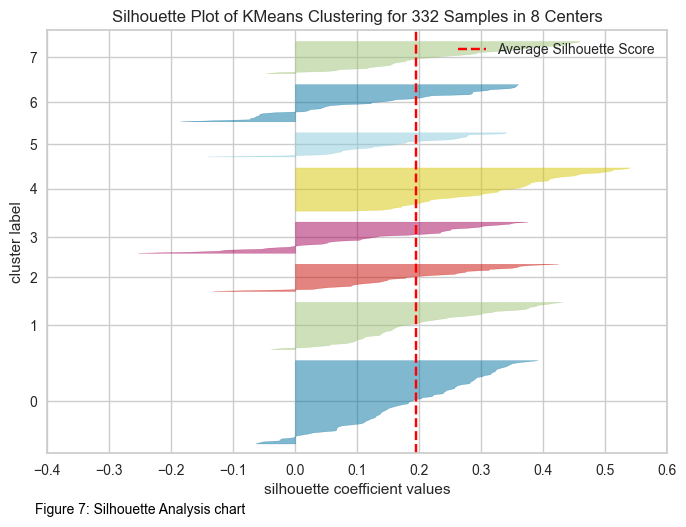

In [81]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Elbow Method
model = KMeans(n_init='auto')
elbow_visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
elbow_visualizer.fit(data_selected)
text_elbow = "Figure 6: Elbow Method chart"
plt.text(-0.02, -0.15, text_elbow, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='left', color='black')
# Save the figures as a PDF
plt.savefig(f"visualizations/figure_6_elbow_method_chart.pdf")
elbow_visualizer.show()

# Silhouette Analysis
model2 = KMeans(n_init=10)
silhouette_visualizer = SilhouetteVisualizer(model2, colors='yellowbrick')
silhouette_visualizer.fit(data_selected)
text_silhouette = "Figure 7: Silhouette Analysis chart"
plt.text(-0.02, -0.15, text_silhouette, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='left', color='black')
# Save the figures as a PDF
plt.savefig(f"visualizations/figure_7_silhouette_analysis_chart.pdf")
silhouette_visualizer.show()

# Store the figures
fig_dict["Figure 6"] = "Elbow Method chart"
fig_dict["Figure 7"] = "Silhouette Analysis chart"

plt.show()

In [100]:
# Assign the number of clusters
optimal_clusters = elbow_visualizer.elbow_value_

# define the model
kmeans = KMeans(n_clusters=optimal_clusters, n_init = 'auto', random_state=42)

# Perform k-means clustering
cluster = kmeans.fit_predict(data_selected)

# Initialize convergence status
converged = False

# Perform clustering until convergence
while not converged:
    # Store previous cluster assignments for convergence check
    clusters_all = cluster.copy()

    # Update centroids
    centroids = kmeans.cluster_centers_

    # Assign data points to clusters
    cluster = kmeans.predict(data_selected)

    # Check for convergence (if cluster assignments remain unchanged)
    converged = np.array_equal(clusters_all, cluster)

data_with_assignments_kmeans = data_selected.copy()

data_with_assignments_kmeans['cluster_assignment'] = cluster

# dataframe to store the final centroids
centroids_df = pd.DataFrame(centroids, columns=data_selected.columns)
print("Centroids at Convergence:")
print(centroids_df)

data_with_assignments_kmeans.head(10)


Centroids at Convergence:
      Fresh      Milk    Frozen  Detergents_Paper  Delicassen
0  0.649352  0.805131 -0.184377          0.283362    1.575801
1  0.561925 -0.607593  1.351719         -0.616071   -0.164175
2 -0.604392  1.239845 -0.359975          1.639783    0.001482
3 -0.274034 -0.501038 -0.509582         -0.483666   -0.477579


,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster_assignment
0,0.383041,1.652898,-0.967004,0.305053,0.390465,0
1,-0.305588,1.698756,-0.059255,0.569139,0.922591,0
2,0.456174,-0.866283,2.662821,-0.619462,0.937169,1
3,-0.016491,1.236906,-0.701951,-0.069958,0.527749,0
4,0.316411,-0.269838,-0.811022,0.503864,-0.572949,3
5,-0.241535,0.253353,-0.113790,0.581085,1.882360,0
6,-0.439829,-0.136137,-0.843274,-0.103662,-0.323895,3
7,-0.434552,2.080802,-0.412855,2.331989,1.313788,2
8,-0.758497,0.386459,1.487672,1.714224,0.883714,2
9,0.441572,-0.887723,-0.259804,-0.601543,-0.631264,3


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

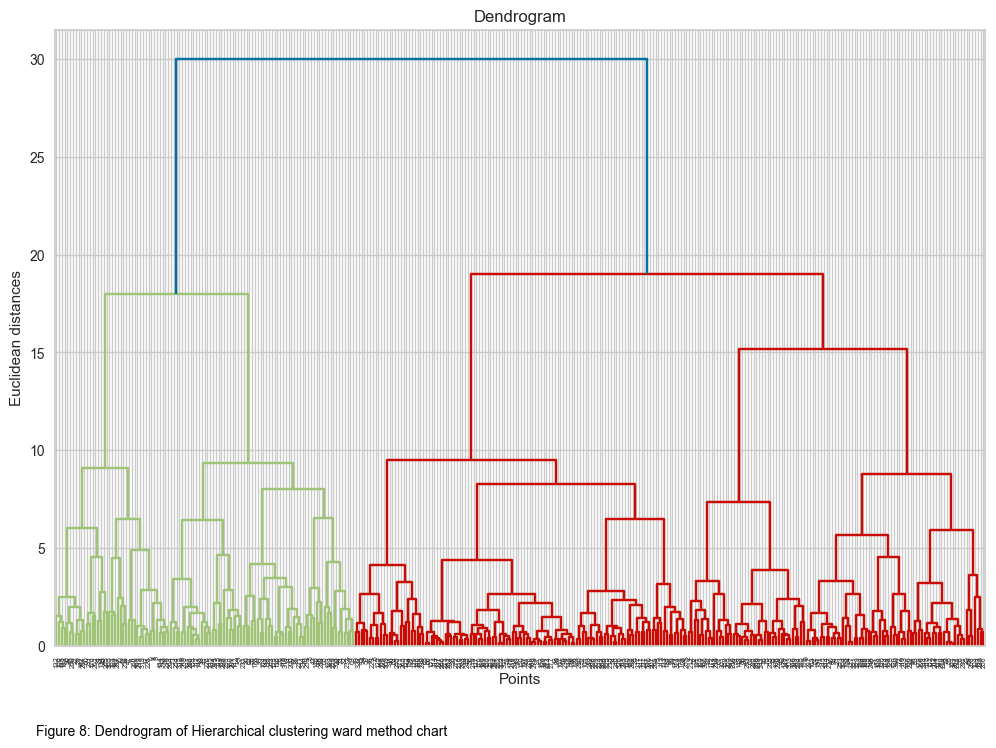

In [99]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering based on ward method
linkage_matrix = linkage(data_selected, method='ward')

# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data_selected.index)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
text_dendrogram = "Figure 8: Dendrogram of Hierarchical clustering ward method chart"
plt.text(-0.02, -0.15, text_dendrogram, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='left', color='black')
# Save the figures as a PDF
plt.savefig(f"visualizations/figure_8_dendrogram_of_Hierarchical_clustering_ward_method_chart.pdf")
# Store the figure
fig_dict["Figure 8"] = "Dendrogram of Hierarchical clustering ward method chart"

plt.show()


In [105]:
# Based on the dendrogram above, t or the distance threshold will equal 16
t = 16

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = None,
                             distance_threshold=t,
                             compute_distances=True)


# Fit the model and obtain cluster assignments
clusters = ac.fit_predict(data_selected)

# Add the cluster assignments as the last column in the original DataFrame
data_with_assignments_ac = data_selected.copy()
data_with_assignments_ac['Cluster'] = clusters

# Display cluster assignments
print(f"Number of clusters: {ac.n_clusters_}")

data_with_assignments_ac.head(10)

Number of clusters: 4


,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.383041,1.652898,-0.967004,0.305053,0.390465,3
1,-0.305588,1.698756,-0.059255,0.569139,0.922591,1
2,0.456174,-0.866283,2.662821,-0.619462,0.937169,0
3,-0.016491,1.236906,-0.701951,-0.069958,0.527749,3
4,0.316411,-0.269838,-0.811022,0.503864,-0.572949,2
5,-0.241535,0.253353,-0.113790,0.581085,1.882360,3
6,-0.439829,-0.136137,-0.843274,-0.103662,-0.323895,2
7,-0.434552,2.080802,-0.412855,2.331989,1.313788,1
8,-0.758497,0.386459,1.487672,1.714224,0.883714,1
9,0.441572,-0.887723,-0.259804,-0.601543,-0.631264,0


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

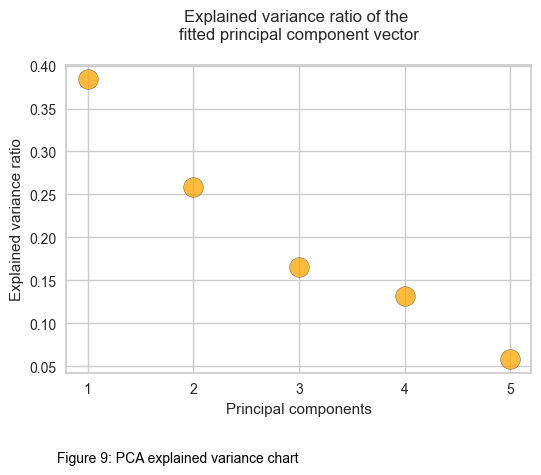

In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

data_selected_pca = pca.fit(data_selected)

plt.figure(figsize=(6,4))
plt.scatter(x=[i+1 for i in range(len(data_selected_pca.explained_variance_ratio_))],
            y=data_selected_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n")
plt.xlabel("Principal components")
plt.xticks([i+1 for i in range(len(data_selected_pca.explained_variance_ratio_))])
plt.ylabel("Explained variance ratio")
text_pca = "Figure 9: PCA explained variance chart"
plt.text(-0.02, -0.3, text_pca, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='left', color='black')
# Save the figures as a PDF
text_pca = text_pca.replace(" ", "_")
text_pca = text_pca.replace(":", "_")
plt.savefig(f"visualizations/{text_pca}.pdf")
# Store the figure
fig_dict["Figure 9"] = "PCA explained variance chart"
plt.show()

In [118]:
# Display the cumulative sum of the explained variance
data_selected_pca = pd.DataFrame({
    'PCA Number': range(1, len(data_selected_pca.explained_variance_ratio_) + 1),
    'Explained Variance Ratio': data_selected_pca.explained_variance_ratio_,
    'Cumulative Sum': data_selected_pca.explained_variance_ratio_.cumsum()
})

data_selected_pca

,PCA Number,Explained Variance Ratio,Cumulative Sum
0,1,0.384803,0.384803
1,2,0.259017,0.643820
2,3,0.165653,0.809473
3,4,0.131480,0.940953
4,5,0.059047,1.000000


    Considering this part comes after feature selection, I did not include this dimension reduction method going into the kmeans and hierarchical clustering.  Based on the cumulative sum of the PCA explained variance ratio, I would only keep 3 or 4 PCA and modelling with both sets to see which yielded better results

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. With both the kmeans and hierarchical clustering methods, both resulted in 4 clusters.
2. There was sufficient variance in each of the 6 KPIs to be included in the model.
3. The KPI 'Grocery' was strongly correlated with 'detergents_paper' and 'milk', and was excluded as a result.
4. The correlations were otherwise low, even after removing 108 records containing outliers